In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

import joblib


In [ ]:
df = pd.read_csv("creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape


(284807, 31)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df["Class"].value_counts()


,count
Class,
0,284315
1,492


In [ ]:
df["Class"].value_counts(normalize=True)


,proportion
Class,
0,0.998273
1,0.001727


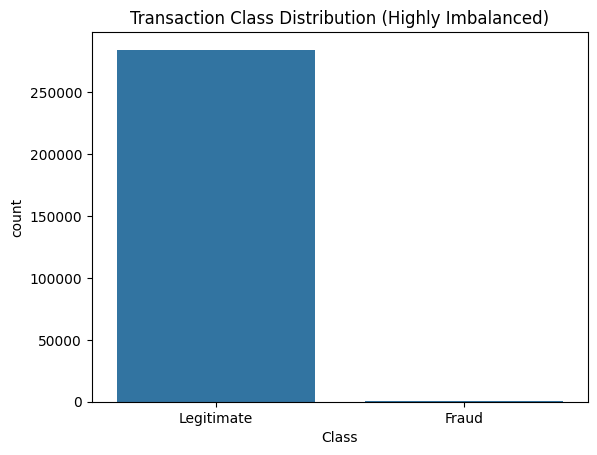

In [ ]:
sns.countplot(x="Class", data=df)
plt.xticks([0,1], ["Legitimate", "Fraud"])
plt.title("Transaction Class Distribution (Highly Imbalanced)")
plt.show()


In [ ]:
X = df.drop("Class", axis=1)
y = df["Class"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lr_model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

lr_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
lr_pred = lr_model.predict(X_test_scaled)

print("Logistic Regression Performance")
print("Precision:", precision_score(y_test, lr_pred))
print("Recall:", recall_score(y_test, lr_pred))
print("F1 Score:", f1_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

Logistic Regression Performance
Precision: 0.06097560975609756
Recall: 0.9183673469387755
F1 Score: 0.11435832274459974
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



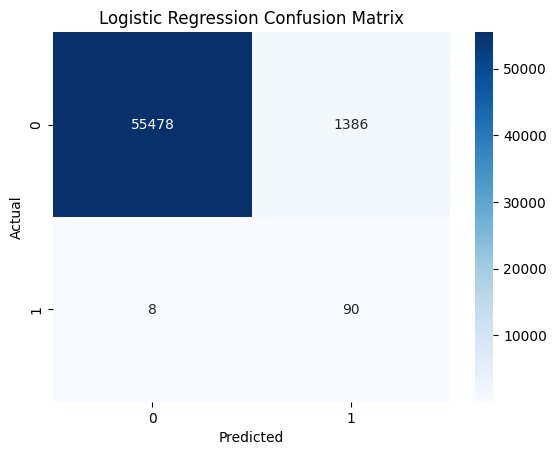

In [ ]:
cm_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
rf_sample_size = 50000

X_train_rf = X_train_scaled[:rf_sample_size]
y_train_rf = y_train[:rf_sample_size]

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=50,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

rf_model.fit(X_train_rf, y_train_rf)

RandomForestClassifier(class_weight='balanced', n_estimators=50, n_jobs=-1,
                       random_state=42)

In [ ]:
rf_pred = rf_model.predict(X_test_scaled)

print("Random Forest Performance")
print("Precision:", precision_score(y_test, rf_pred))
print("Recall:", recall_score(y_test, rf_pred))
print("F1 Score:", f1_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Performance
Precision: 0.8974358974358975
Recall: 0.7142857142857143
F1 Score: 0.7954545454545454
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.71      0.80        98

    accuracy                           1.00     56962
   macro avg       0.95      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Precision": [
        precision_score(y_test, lr_pred),
        precision_score(y_test, rf_pred)
    ],
    "Recall": [
        recall_score(y_test, lr_pred),
        recall_score(y_test, rf_pred)
    ],
    "F1 Score": [
        f1_score(y_test, lr_pred),
        f1_score(y_test, rf_pred)
    ]
})

comparison_df


,Model,Precision,Recall,F1 Score
0,Logistic Regression,0.060976,0.918367,0.114358
1,Random Forest,0.897436,0.714286,0.795455


In [ ]:
joblib.dump(rf_model, "fraud_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']